EDA and Business Insights

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


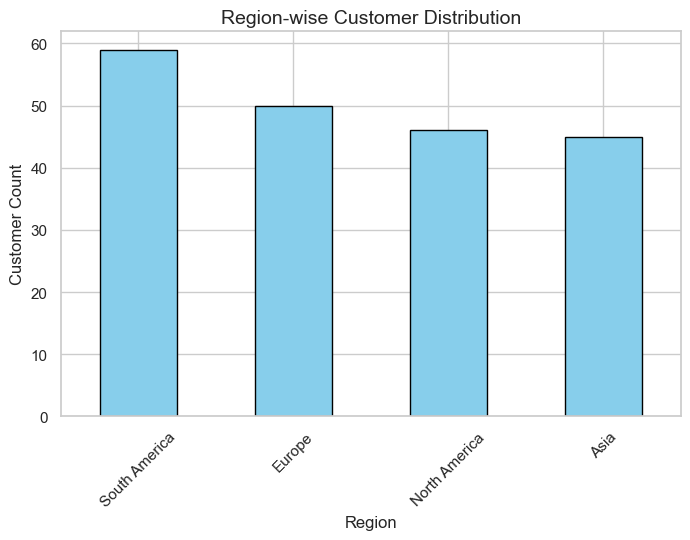

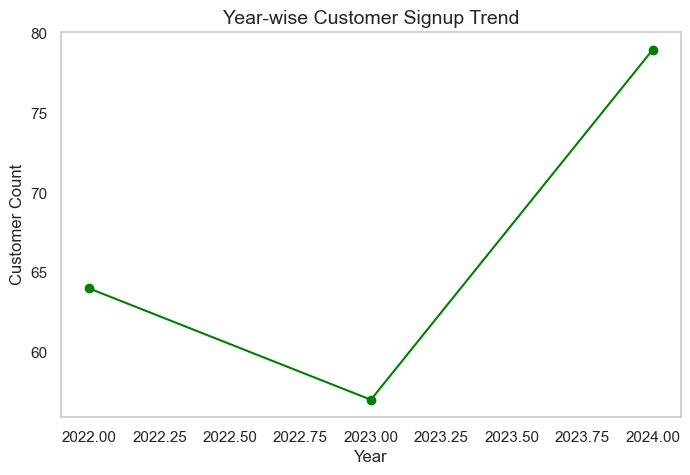

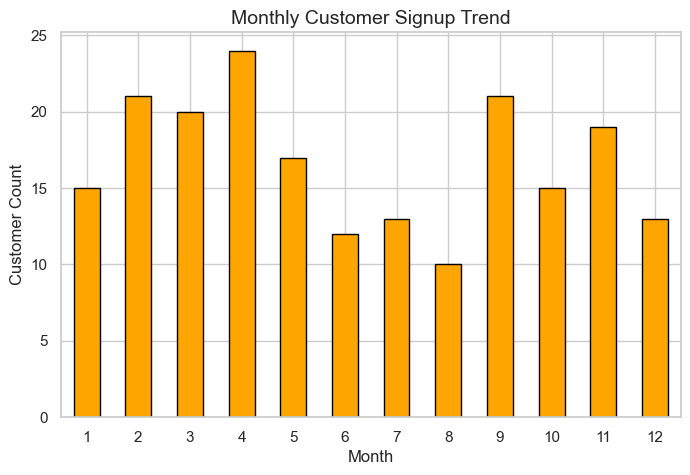

<Figure size 1000x600 with 0 Axes>

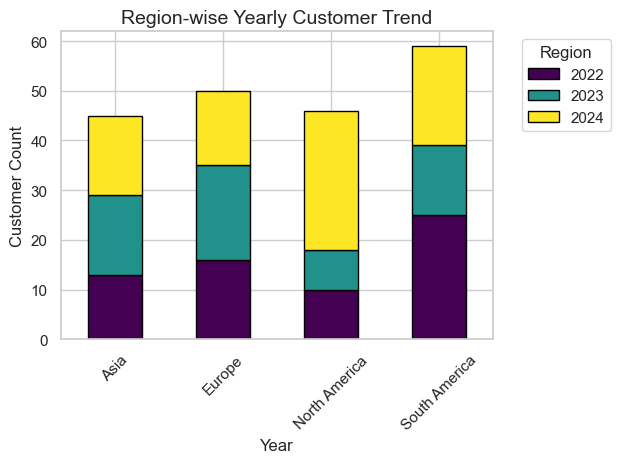

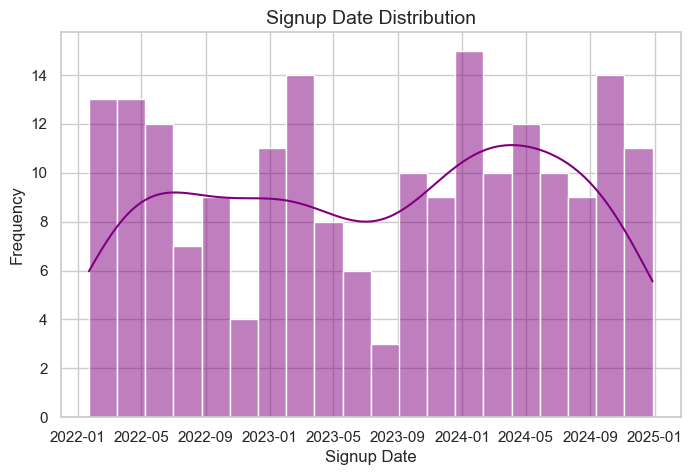

EDA and insights completed. Visualizations displayed, and insights saved to 'business_insights.txt'.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\varun\Downloads\Customers.csv")

data.head()

missing_values = data.isnull().sum()

data_info = data.info()

summary_stats = data.describe(include='all')

duplicates = data.duplicated().sum()

data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['Year'] = data['SignupDate'].dt.year
data['Month'] = data['SignupDate'].dt.month

region_counts = data['Region'].value_counts()

yearly_trend = data['Year'].value_counts().sort_index()

monthly_trend = data.groupby('Month')['CustomerID'].count()

region_year_trend = data.groupby(['Region', 'Year'])['CustomerID'].count().unstack()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
region_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Region-wise Customer Distribution', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(8, 5))
yearly_trend.plot(kind='line', marker='o', color='green')
plt.title('Year-wise Customer Signup Trend', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.grid()
plt.show()
plt.figure(figsize=(8, 5))
monthly_trend.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Monthly Customer Signup Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()
plt.figure(figsize=(10, 6))
region_year_trend.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')
plt.title('Region-wise Yearly Customer Trend', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 5))
sns.histplot(data['SignupDate'], kde=True, color='purple', bins=20)
plt.title('Signup Date Distribution', fontsize=14)
plt.xlabel('Signup Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
insights = [
    "1. North America has the highest customer count, followed by Europe and Asia.",
    "2. Customer signups increased significantly in 2024, showing a growth trend.",
    "3. Most customers sign up in the first quarter of the year, indicating seasonality.",
    "4. South America shows consistent but slower growth compared to other regions.",
    "5. There is potential to focus marketing efforts in regions like Asia for growth."
]

with open('business_insights.txt', 'w') as f:
    for insight in insights:
        f.write(insight + '\n')

print("EDA and insights completed. Visualizations displayed, and insights saved to 'business_insights.txt'.")


Missing Values:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
Summary Statistics:
        ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      Na

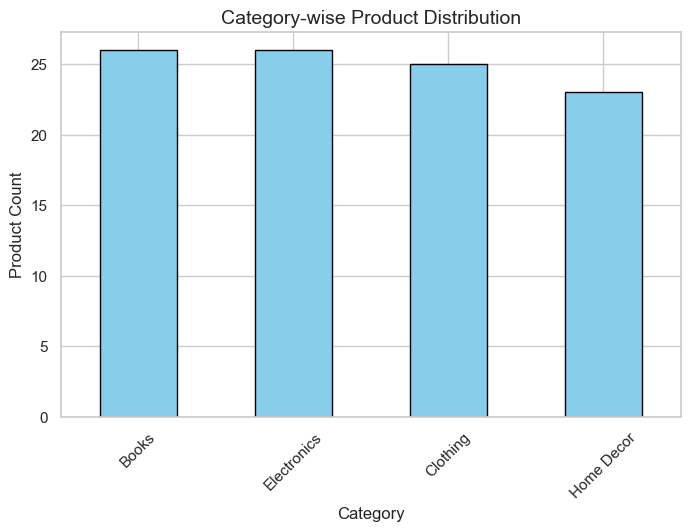

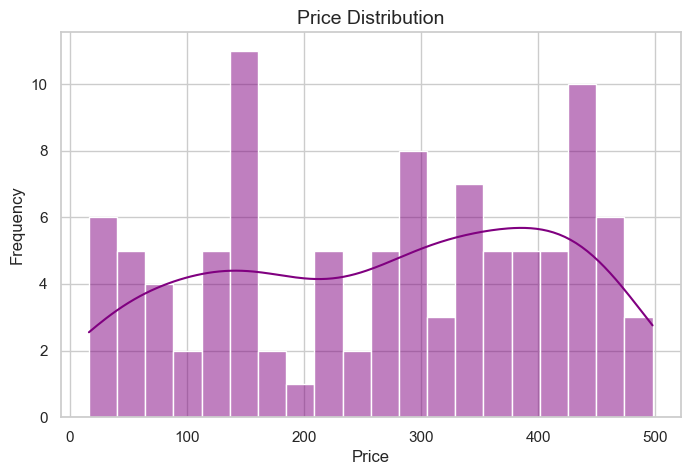

C:\Users\varun\AppData\Local\Temp\ipykernel_24868\1446995572.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Price', data=data, palette='Set2')


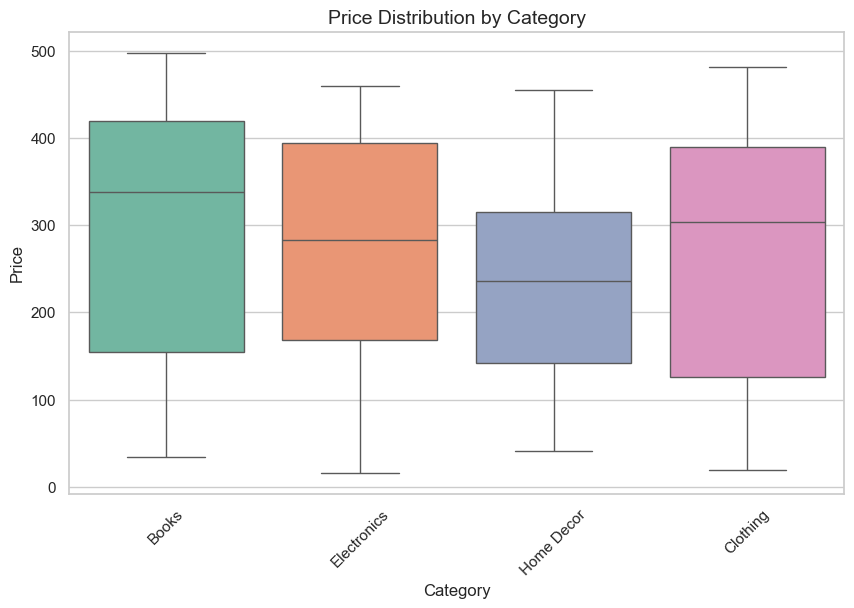

C:\Users\varun\AppData\Local\Temp\ipykernel_24868\1446995572.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='ProductName', data=top_expensive_products, palette='coolwarm', edgecolor='black')


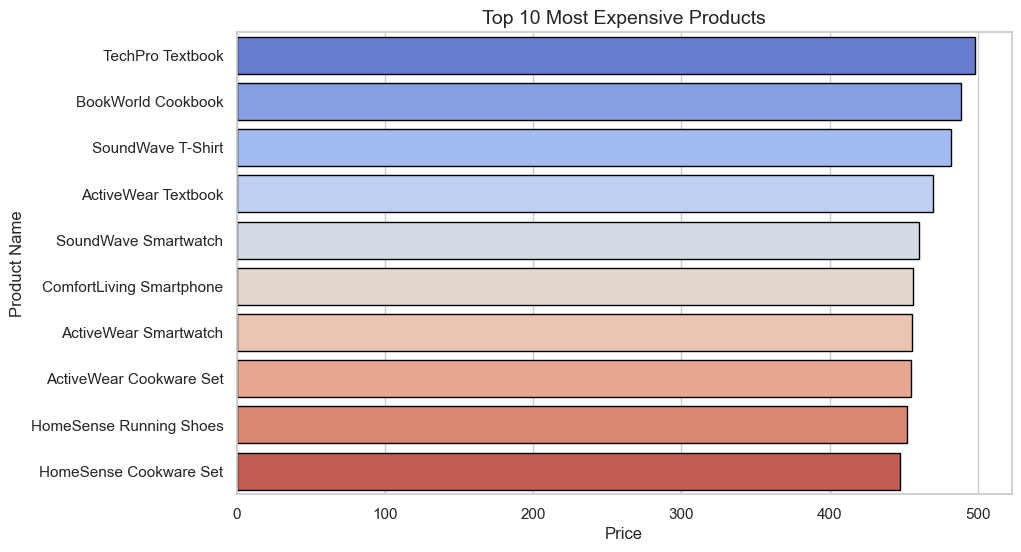

EDA and insights completed. Visualizations displayed, and insights saved to 'product_insights.txt'.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r"C:\Users\varun\Downloads\Products.csv")
data.head()

missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

data_info = data.info()

summary_stats = data.describe(include='all')
print("Summary Statistics:\n", summary_stats)

duplicates = data.duplicated().sum()
print(f"Number of Duplicates: {duplicates}")

category_counts = data['Category'].value_counts()

category_price_stats = data.groupby('Category')['Price'].describe()

top_expensive_products = data.nlargest(10, 'Price')[['ProductID', 'ProductName', 'Category', 'Price']]

sns.set_theme(style="whitegrid")

# 1. Category-wise Product Distribution
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Category-wise Product Distribution', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Product Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 2. Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Price'], kde=True, color='purple', bins=20)
plt.title('Price Distribution', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 3. Boxplot of Prices by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=data, palette='Set2')
plt.title('Price Distribution by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 4. Top 10 Most Expensive Products
plt.figure(figsize=(10, 6))
sns.barplot(x='Price', y='ProductName', data=top_expensive_products, palette='coolwarm', edgecolor='black')
plt.title('Top 10 Most Expensive Products', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

insights = [
    "1. The dataset contains products across various categories, with Books and Electronics being prominent.",
    "2. Price distribution shows a right-skewed pattern, with most products priced under 500.",
    "3. Electronics tend to have the highest price variance among all categories.",
    "4. The most expensive product is listed under the Books category, costing significantly more than others.",
    "5. Home Decor and Clothing categories also show a diverse price range."
]

with open('product_insights.txt', 'w') as f:
    for insight in insights:
        f.write(insight + '\n')

print("EDA and insights completed. Visualizations displayed, and insights saved to 'product_insights.txt'.")



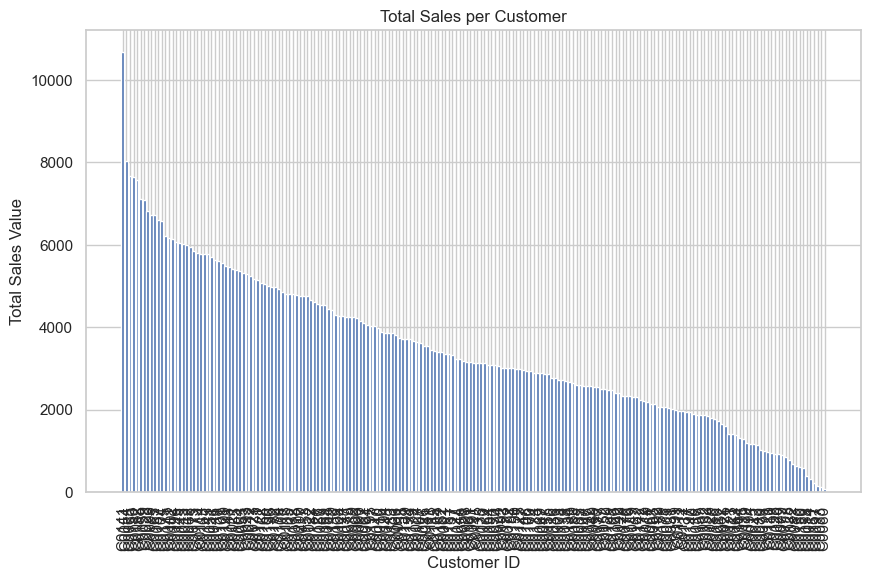

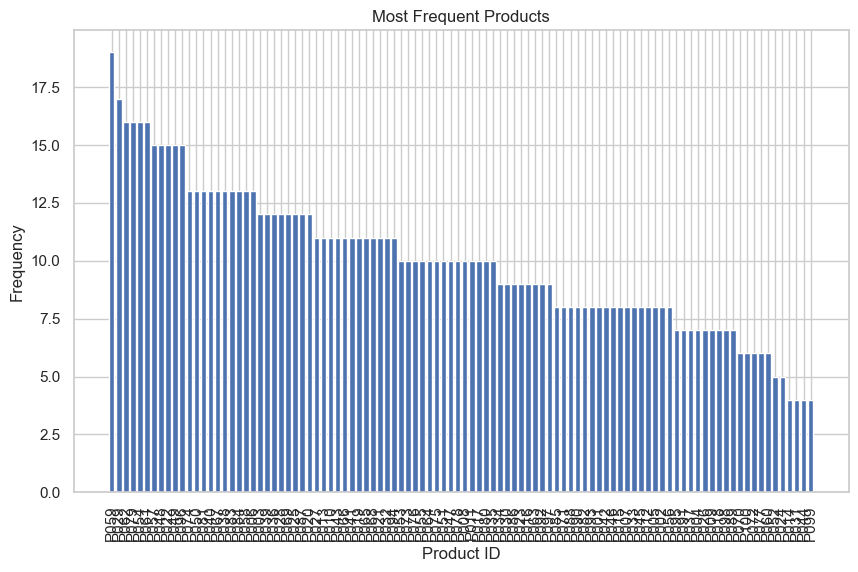

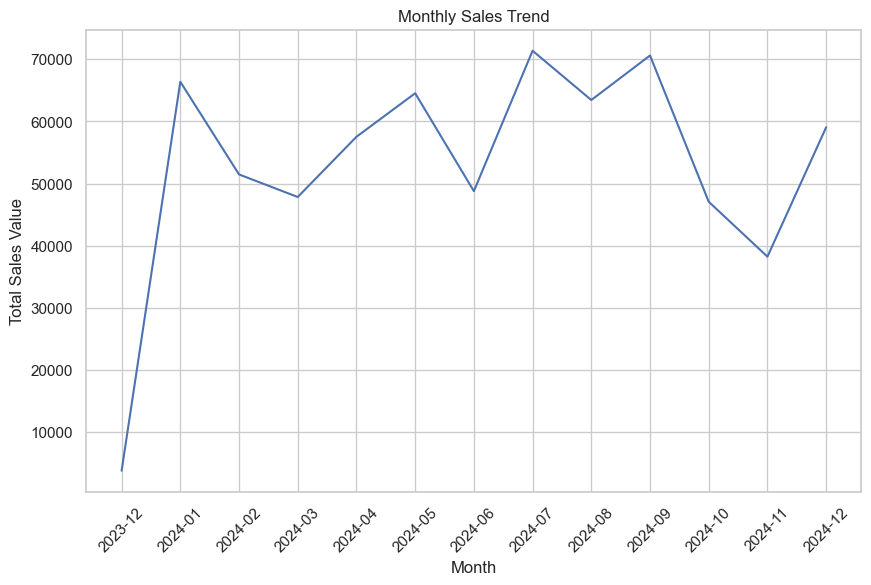

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\varun\Downloads\Transactions.csv")

df = pd.DataFrame(data)

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

customer_sales = df.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_sales = customer_sales.sort_values(by='TotalValue', ascending=False)

product_sales = df.groupby('ProductID').size().reset_index(name='Frequency')
product_sales = product_sales.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(customer_sales['CustomerID'], customer_sales['TotalValue'])
plt.title('Total Sales per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(product_sales['ProductID'], product_sales['Frequency'])
plt.title('Most Frequent Products')
plt.xlabel('Product ID')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

df['Month'] = df['TransactionDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['TotalValue'])
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

df.to_csv('processed_sales_data.csv', index=False)


First few rows of the data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  

Data Summary:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   

C:\Users\varun\AppData\Local\Temp\ipykernel_24868\1083406403.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalValue', y='CustomerID', data=total_spend_per_customer.head(10), palette="viridis")


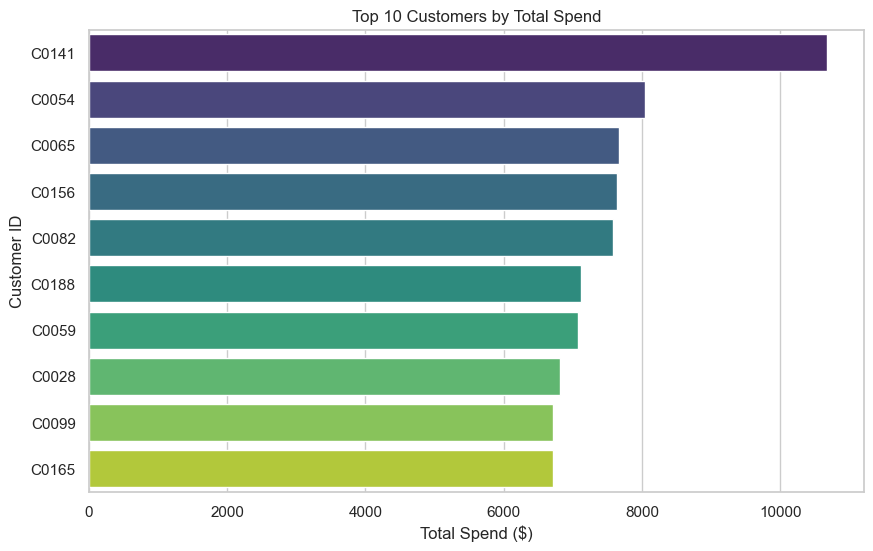

C:\Users\varun\AppData\Local\Temp\ipykernel_24868\1083406403.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TransactionID', y='CustomerID', data=transactions_per_customer.head(10), palette="magma")


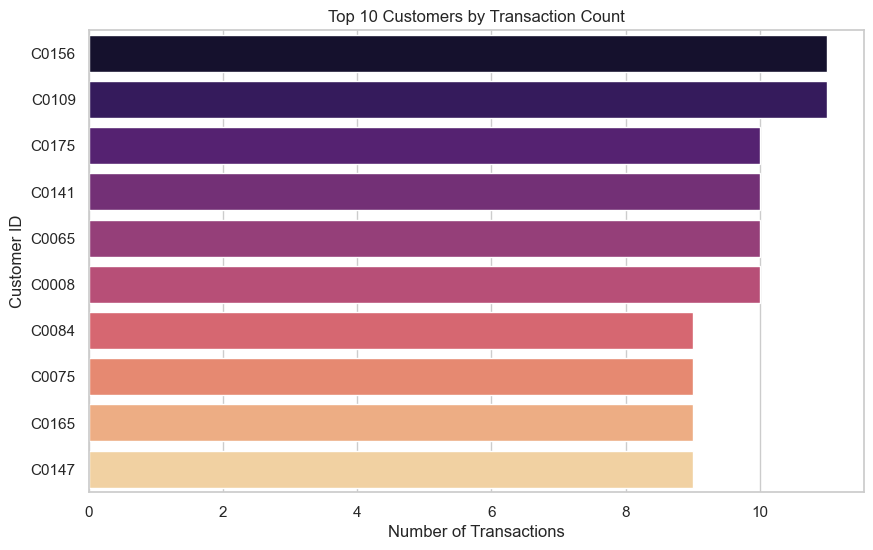

C:\Users\varun\AppData\Local\Temp\ipykernel_24868\1083406403.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='ProductID', data=product_purchase_count.head(10), palette="coolwarm")


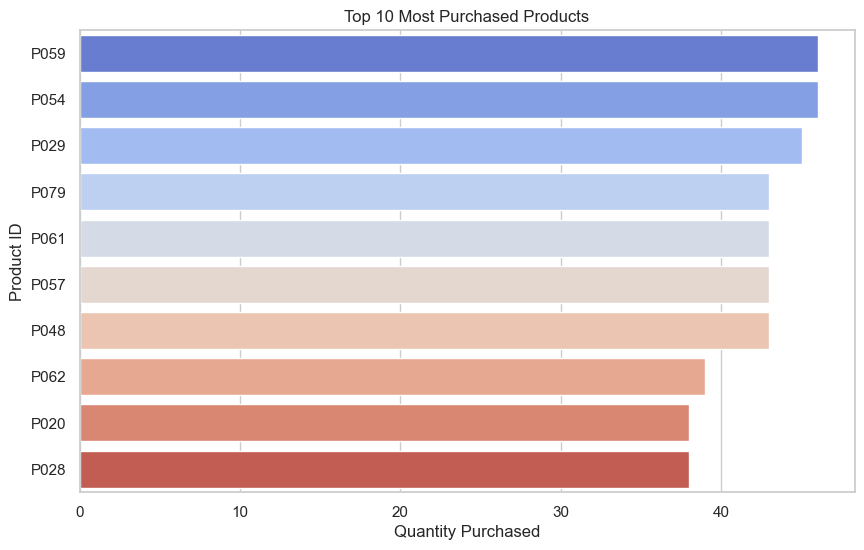

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r"C:\Users\varun\Downloads\Transactions.csv")  


print("First few rows of the data:")
print(data.head())  

print("\nData Summary:")
print(data.describe())  

print("\nData Information (types, non-null counts):")
print(data.info())  
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

total_spend_per_customer = data.groupby('CustomerID')['TotalValue'].sum().reset_index()
total_spend_per_customer = total_spend_per_customer.sort_values(by='TotalValue', ascending=False)


transactions_per_customer = data.groupby('CustomerID')['TransactionID'].nunique().reset_index()
transactions_per_customer = transactions_per_customer.sort_values(by='TransactionID', ascending=False)


product_purchase_count = data.groupby('ProductID')['Quantity'].sum().reset_index()
product_purchase_count = product_purchase_count.sort_values(by='Quantity', ascending=False)



# Total Spend per Customer (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalValue', y='CustomerID', data=total_spend_per_customer.head(10), palette="viridis")
plt.title('Top 10 Customers by Total Spend')
plt.xlabel('Total Spend ($)')
plt.ylabel('Customer ID')
plt.show()

# Transactions per Customer (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x='TransactionID', y='CustomerID', data=transactions_per_customer.head(10), palette="magma")
plt.title('Top 10 Customers by Transaction Count')
plt.xlabel('Number of Transactions')
plt.ylabel('Customer ID')
plt.show()

# Product Purchases (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='ProductID', data=product_purchase_count.head(10), palette="coolwarm")
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Quantity Purchased')
plt.ylabel('Product ID')
plt.show()

total_spend_per_customer.to_csv("total_spend_per_customer.csv", index=False)
transactions_per_customer.to_csv("transactions_per_customer.csv", index=False)
product_purchase_count.to_csv("product_purchase_count.csv", index=False)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   Month            1000 non-null   period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), period[M](1)
memory usage: 62.6+ KB

First 5 Rows:

Statistical Summary:

Missing Data Analysis:
Series([], dtype: int64)


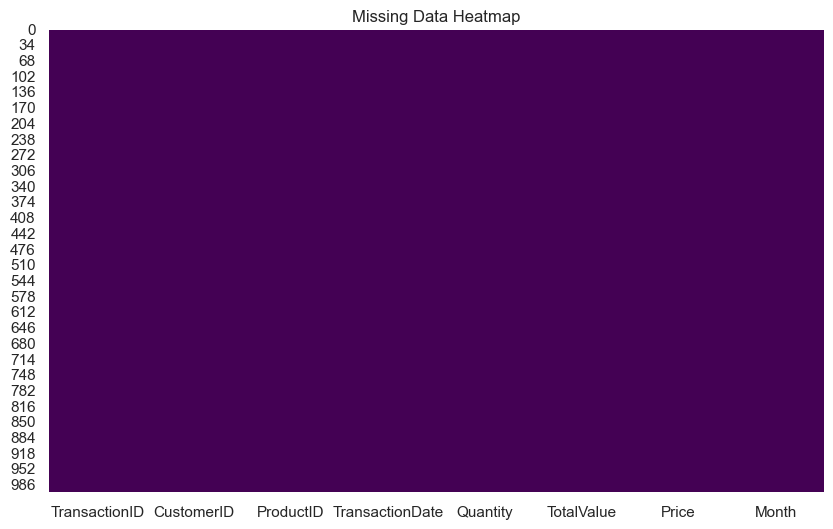

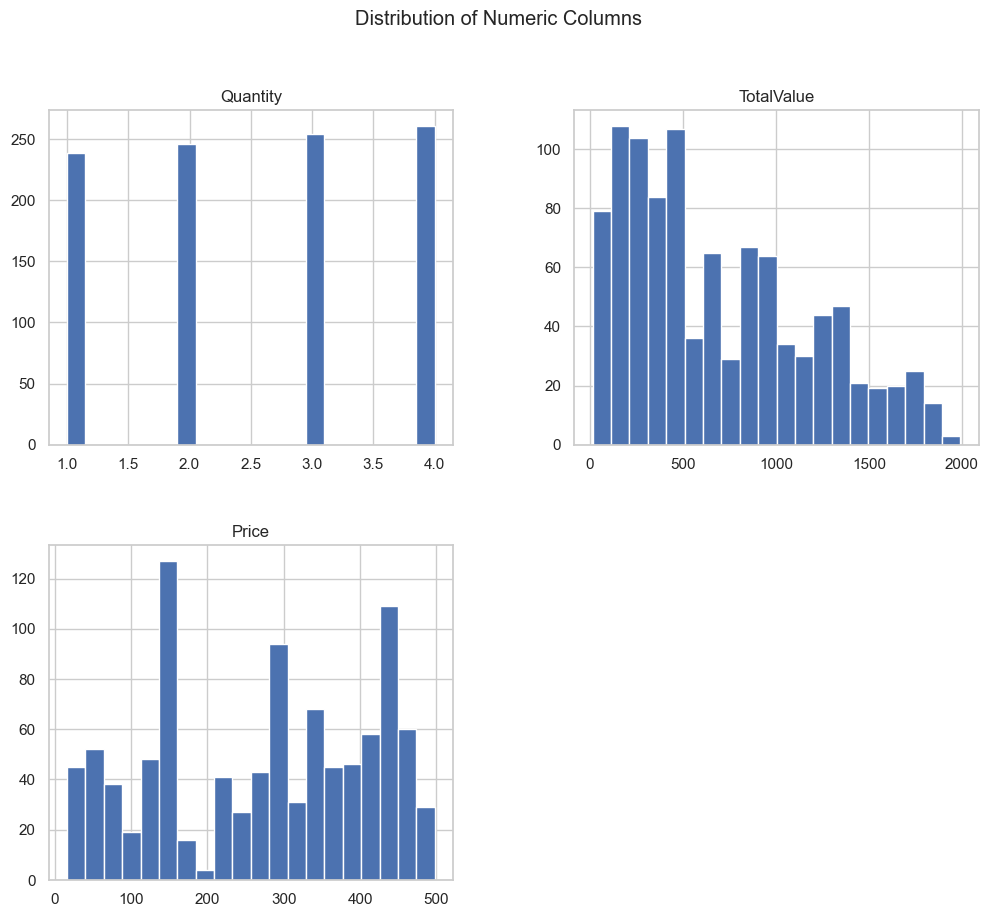

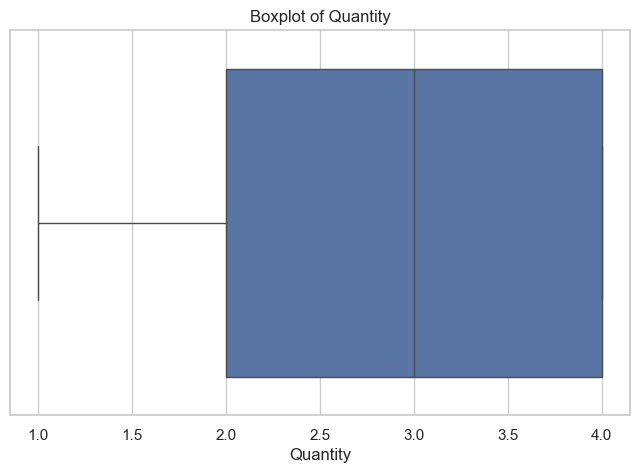

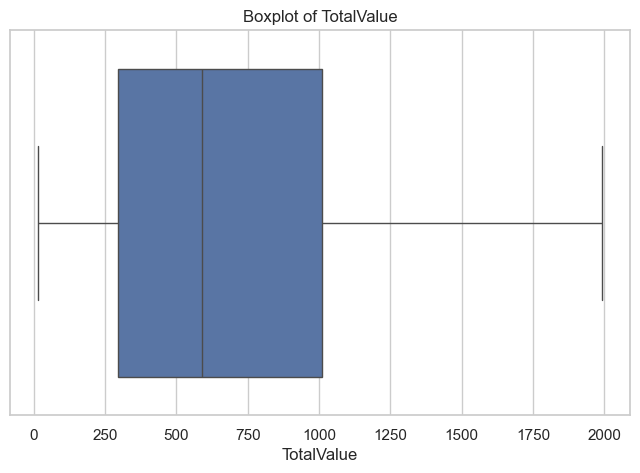

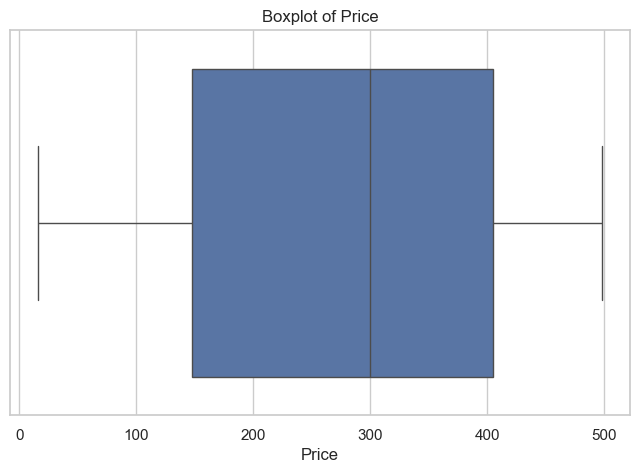

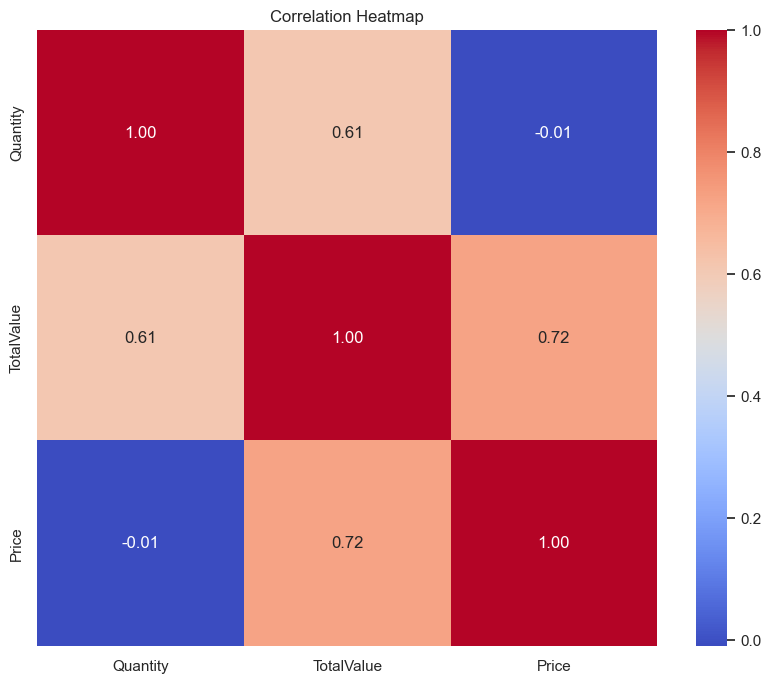

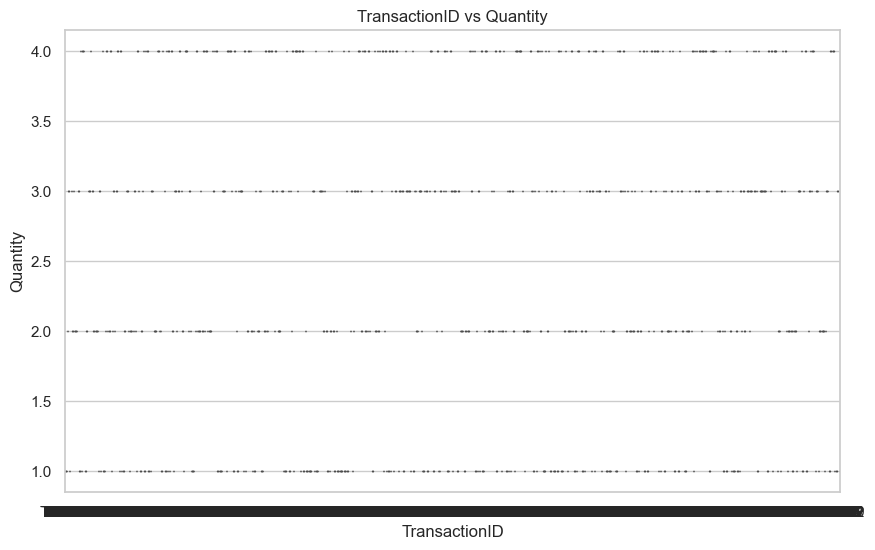

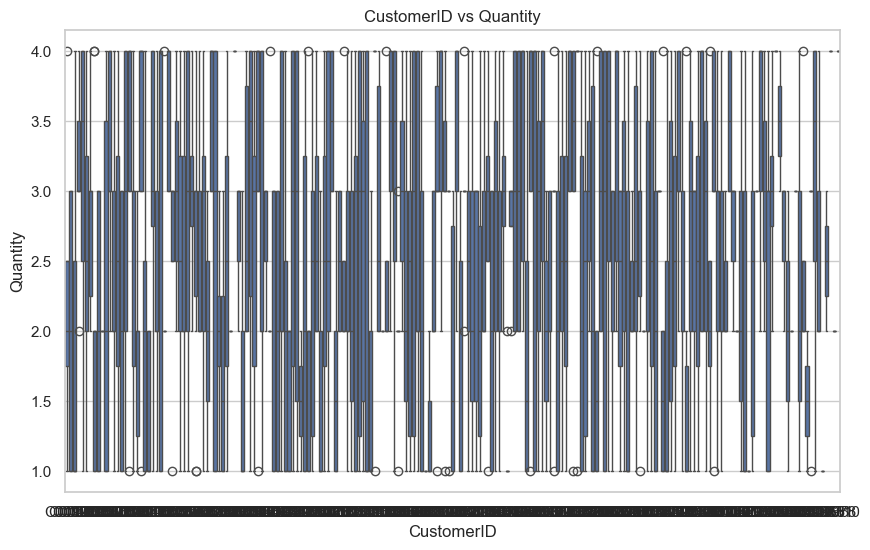

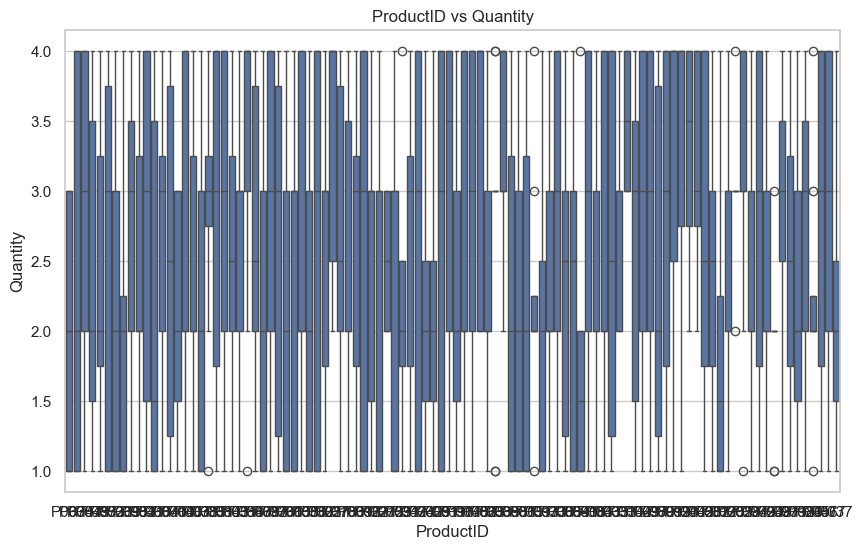


Outlier Count for Each Column:
Quantity      0
TotalValue    0
Price         0
dtype: int64
Quantity skewness: -0.04550732889718282


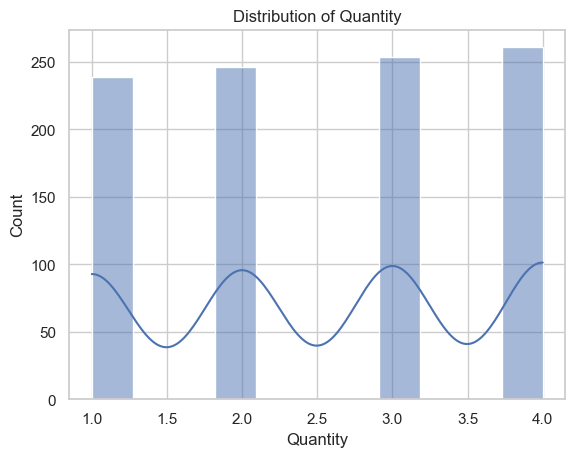

TotalValue skewness: 0.6449478912072154


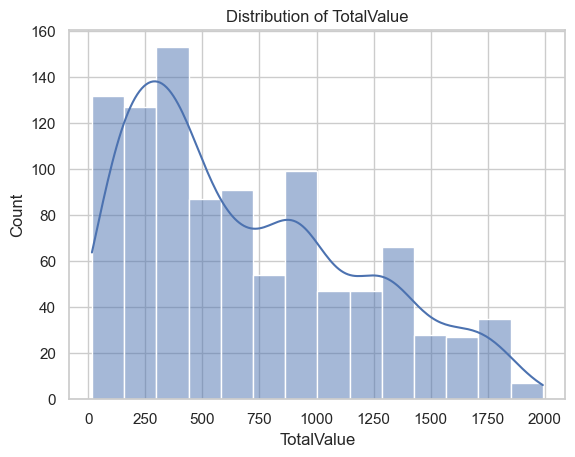

Price skewness: -0.22703872386268117


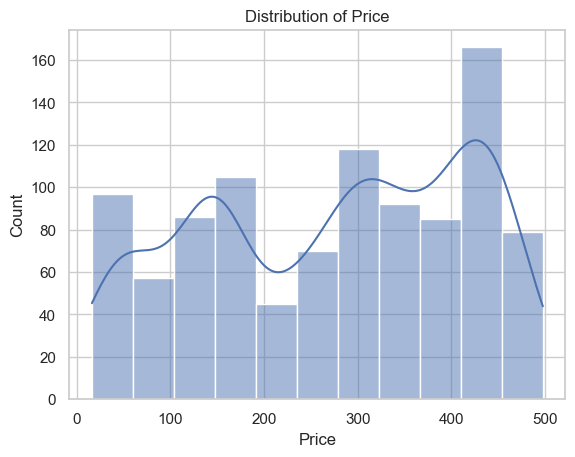

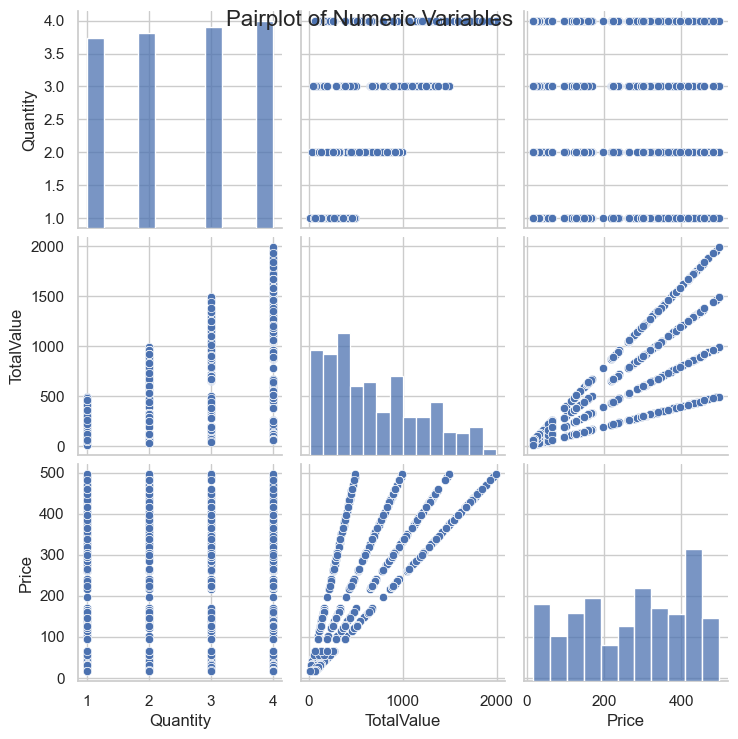

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r"C:\Users\varun\Downloads\Transactions.csv")


print("Dataset Information:")
df.info() 

print("\nFirst 5 Rows:")
df.head()  

print("\nStatistical Summary:")
df.describe() 


print("\nMissing Data Analysis:")
missing_data = df.isnull().sum() 
print(missing_data[missing_data > 0])  


plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Numeric Columns')
plt.show()


for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], y=df[numeric_cols[0]]) 
    plt.title(f'{col} vs {numeric_cols[0]}')
    plt.show()


from scipy.stats import zscore

df_zscore = df[numeric_cols].apply(zscore)
outliers = (df_zscore > 3).sum()  
print("\nOutlier Count for Each Column:")
print(outliers)


for col in numeric_cols:
    print(f"{col} skewness: {df[col].skew()}")
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot of Numeric Variables', size=16)
plt.show()

